In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# I copy-pasted the data from the file to not use a local path
data = np.array([
    [5.6, 75000],
    [7.2, 120000],
    [3.1, 47000],
    [4.4, 37000],
    [1.0, 16000],
    [6.7, 140000],
    [1.2, 14000],
    [5.4, 80000],
    [9.8, 150000],
    [2.2, 16000],
    [3.5, 50000],
    [20, 160000],
    [17.6, 165000],
    [1.3, 17500],
    [1.7, 20000],
    [2.4, 20000],
    [5.4, 84000],
    [6.8, 93000],
    [4.9, 75000],
    [19.0, 140000]
])

In [18]:
# Split data into features (X) and target (y)
X = data[:, 0]  # Years of experience
y = data[:, 1]  # Salary

In [19]:
# Normalize the features
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

In [20]:
# Add a bias term (intercept) to X
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [21]:
# Initialize parameters (theta)
theta = np.zeros(2)  # [theta0 (intercept), theta1 (slope)]

In [22]:
# Define hyperparameters
learning_rate = 0.01
num_iterations = 1000

In [23]:
# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [24]:
# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Compute predictions
        predictions = X.dot(theta)

        # Compute gradients
        gradients = (1 / m) * X.T.dot(predictions - y)

        # Update parameters
        theta -= learning_rate * gradients

        # Compute and store the cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

In [25]:
# Run gradient descent
theta, cost_history = gradient_descent(X_normalized, y, theta, learning_rate, num_iterations)

Iteration 0: Cost = 4176247633.9552293
Iteration 100: Cost = 846845567.5688109
Iteration 200: Cost = 400773361.24293196
Iteration 300: Cost = 341008752.0762172
Iteration 400: Cost = 333001509.17204744
Iteration 500: Cost = 331928701.3712382
Iteration 600: Cost = 331784966.93090063
Iteration 700: Cost = 331765709.43731827
Iteration 800: Cost = 331763129.3245895
Iteration 900: Cost = 331762783.641925


In [26]:
# Print the final parameters
print(f"Final parameters: theta0 (intercept) = {theta[0]}, theta1 (slope) = {theta[1]}")

Final parameters: theta0 (intercept) = 75971.72006447797, theta1 (slope) = 45526.996829949705


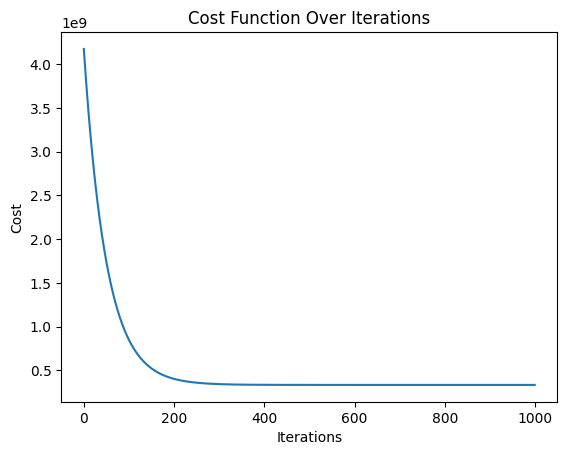

In [27]:
# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

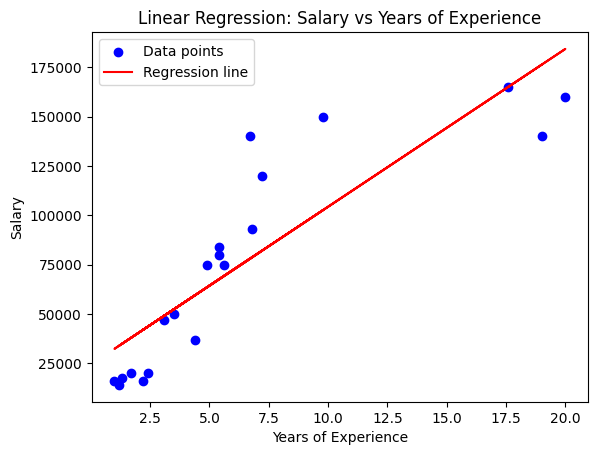

In [28]:
# Plot the data and the regression line
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, X_normalized.dot(theta), color="red", label="Regression line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Years of Experience")
plt.legend()
plt.show()

In [29]:
# Predict salary for a given number of years of experience
def predict_salary(years_of_experience, theta, X_mean, X_std):
    # Normalize the input
    normalized_input = (years_of_experience - X_mean) / X_std
    # Add bias term and predict
    prediction = theta[0] + theta[1] * normalized_input
    return prediction

In [30]:
# Example prediction
years_of_experience = 8
predicted_salary = predict_salary(years_of_experience, theta, X_mean, X_std)
print(f"Predicted salary for {years_of_experience} years of experience: {predicted_salary:.2f}")

Predicted salary for 8 years of experience: 88292.22
